# Módulo 07 - Tarefa 02

#### 1) Carregue a base e garanta que a base está como deveria.

Considere a base que você ajustou na lição passada. Carregue-a. Caso ainda haja alguma pendência, ajuste - lembre-se de que o scikitlearn não recebe variáveis em formato string, somente numéricas, e não aceita '*missings*'.

- Separe 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a variável resposta ```mau```e outro armazenando as variáveis explicativas (lembrando: sem variáveis string, já com as dummies).

In [1]:
# Importando as Bibliotecas
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [5]:
# Carregando o dataframe
df = pd.read_csv('variaveis_dummy.csv')

# Visualizando as primeiras 5 linhas do DataFrame
df.head()

,possui_celular,possui_fone_comercial,possui_fone,possui_email,sexo_F,sexo_M,posse_de_veiculo_N,posse_de_veiculo_Y,posse_de_imovel_N,posse_de_imovel_Y,...,estado_civil_Separated,estado_civil_Single / not married,estado_civil_Widow,tipo_residencia_Co-op apartment,tipo_residencia_House / apartment,tipo_residencia_Municipal apartment,tipo_residencia_Office apartment,tipo_residencia_Rented apartment,tipo_residencia_With parents,mau
0,1,0,0,0,0,1,0,1,0,1,...,0,0,0,0,1,0,0,0,0,False
1,1,0,1,1,1,0,1,0,0,1,...,0,1,0,0,1,0,0,0,0,False
2,1,0,1,1,1,0,1,0,0,1,...,0,1,0,0,1,0,0,0,0,False
3,1,1,1,1,0,1,0,1,0,1,...,0,0,0,0,1,0,0,0,0,False
4,1,0,0,0,1,0,0,1,1,0,...,0,0,0,0,1,0,0,0,0,False


In [6]:
# Verificando as colunas
df.columns

Index(['possui_celular', 'possui_fone_comercial', 'possui_fone',
       'possui_email', 'sexo_F', 'sexo_M', 'posse_de_veiculo_N',
       'posse_de_veiculo_Y', 'posse_de_imovel_N', 'posse_de_imovel_Y',
       'tipo_renda_Commercial associate', 'tipo_renda_Pensioner',
       'tipo_renda_State servant', 'tipo_renda_Student', 'tipo_renda_Working',
       'educacao_Academic degree', 'educacao_Higher education',
       'educacao_Incomplete higher', 'educacao_Lower secondary',
       'educacao_Secondary / secondary special', 'estado_civil_Civil marriage',
       'estado_civil_Married', 'estado_civil_Separated',
       'estado_civil_Single / not married', 'estado_civil_Widow',
       'tipo_residencia_Co-op apartment', 'tipo_residencia_House / apartment',
       'tipo_residencia_Municipal apartment',
       'tipo_residencia_Office apartment', 'tipo_residencia_Rented apartment',
       'tipo_residencia_With parents', 'mau'],
      dtype='object')

In [7]:
# Definindo o target
y = df['mau']

In [8]:
# Definindo as variáveis explicativas
X = df.drop('mau',axis=1)

In [9]:
# Definindo a proporção de teste e treinamento
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7)

#### 2) Vamos para o modelo:

1. Defina um objeto com a função da árvore de decisão vista em aula.
2. Treine o modelo com os dados que você separou para treinamento.
3. Visualize a árvore. Talvez você queira aumentar um pouco a figura.
4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.
5. Calcule a acurácia na base de treinamento

In [10]:
# Definindo a arvore de decisão
clf = DecisionTreeClassifier(random_state=100)
clf = clf.fit(X_train,y_train)

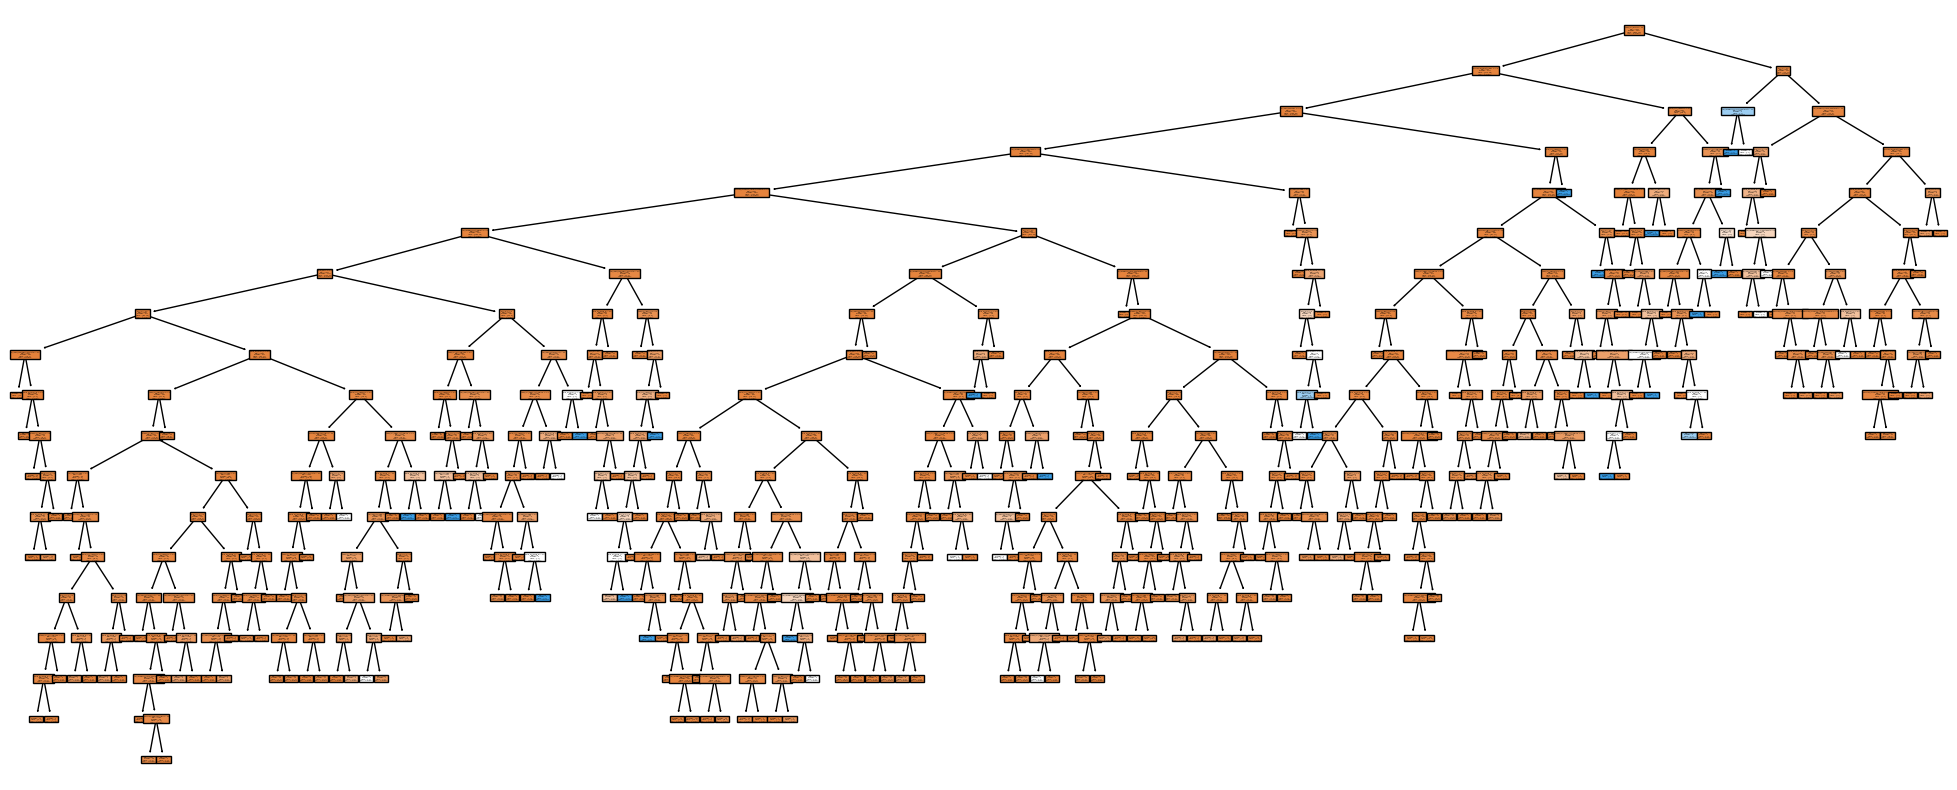

In [11]:
# Visualizando a arvore
plt.figure(figsize=(25, 10))
plot_tree(clf,
          filled=True,
          class_names=['Aprovados', 'Reprovados'],
          feature_names=X_train.columns);

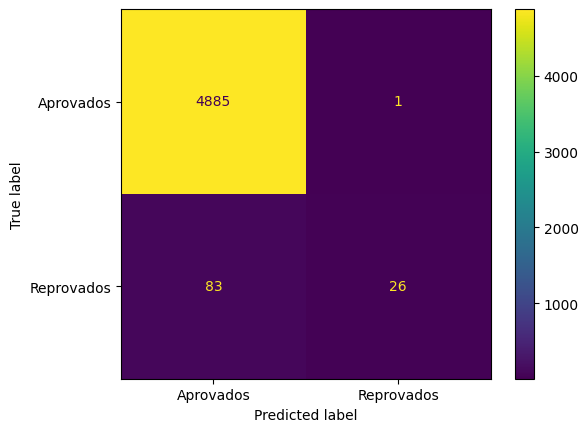

In [12]:
# Plotando a matrix de confusão, a tabela de verdade para o treino
ConfusionMatrixDisplay.from_estimator(clf, X_train, y_train, display_labels=['Aprovados', 'Reprovados'])

In [13]:
# Calculando a acurácia do treino
predict = clf.predict(X_train)
accuracy_score(y_train, predict)

0.9831831831831832

#### 3) Vamos avaliar o modelo na base de testes

1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.
2. Produza a visualização da matriz de confusão para a base de teste.
3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?
5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

In [14]:
# Testando as variáveis de teste
clf = DecisionTreeClassifier(random_state=100)
clf = clf.fit(X_test,y_test)

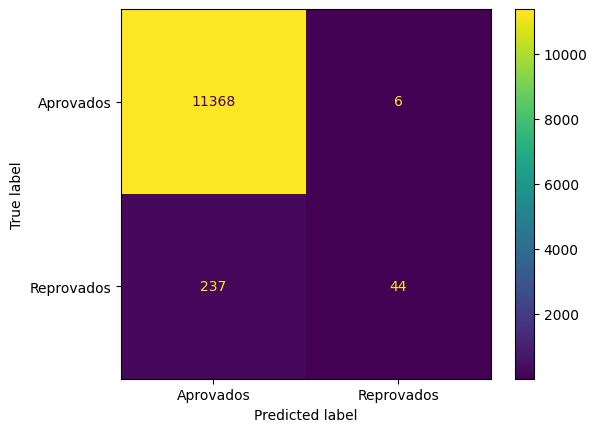

In [15]:
# Plotando a matriz confusão das variáveis de teste
ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test, display_labels=['Aprovados', 'Reprovados'])

In [31]:
# Verificando a Acurácia da base de teste
predict = clf.predict(X_test)
accuracy_score(y_test, predict)*100

97.58901758901759

In [17]:
# Treinando nova árvore de decisão observando os parametros requeridos
clf = DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, random_state=123)
clf = clf.fit(X_train,y_train)

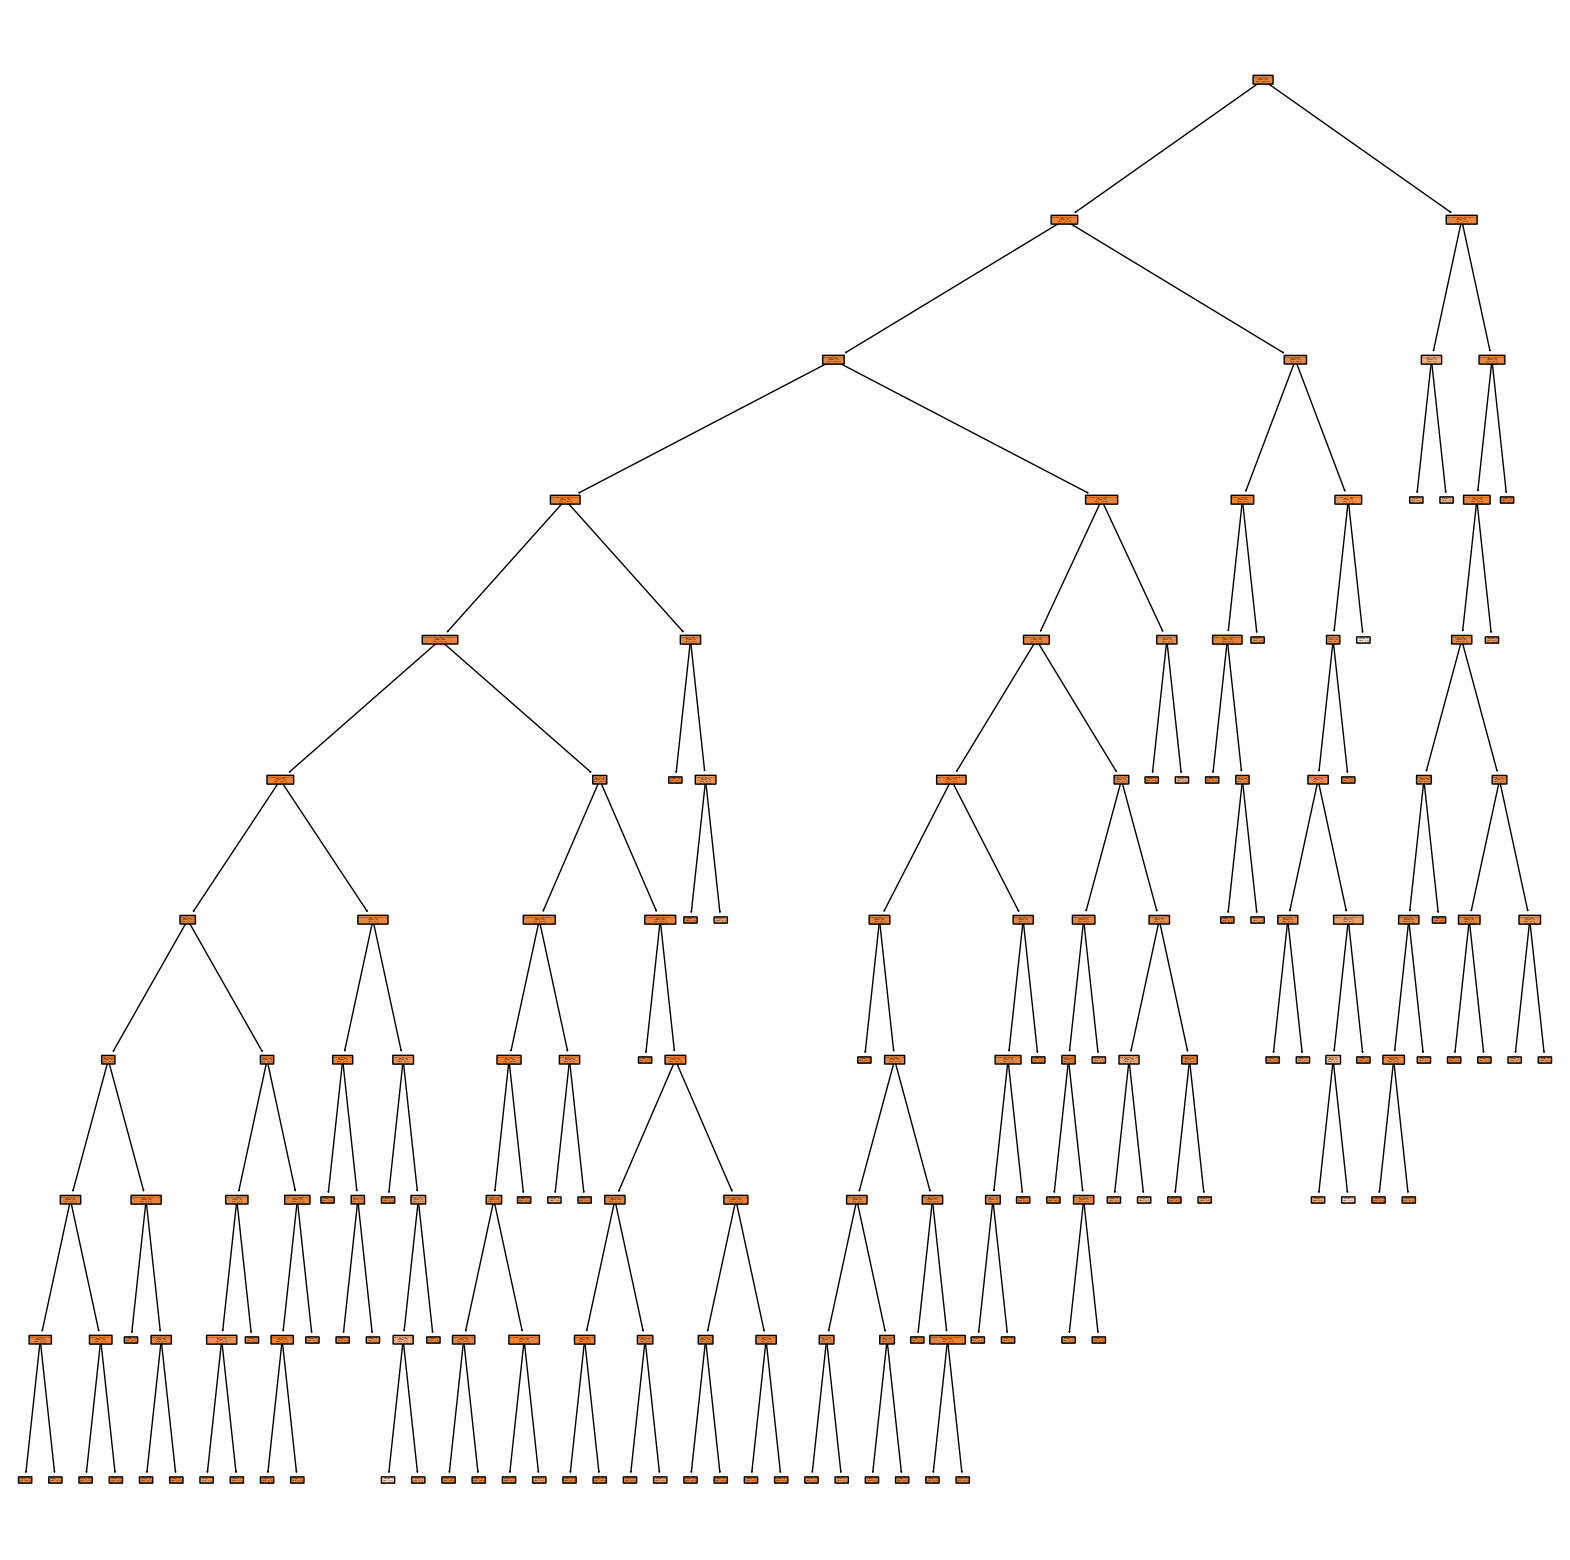

In [18]:
# Plotando a a matriz de classificação da árvore de decisão
plt.figure(figsize=[20,20])
plot_tree(clf,
         filled=True,
         rounded=True,
         class_names=['Aprovado', 'Reprovado'],
         feature_names=X_train.columns);

In [19]:
# Calculando a proporção de aprovados e reprovados na base de teste
proporcao_aprovados = (predict == 0).sum() / len(predict)
proporcao_reprovados = (predict == 1).sum() / len(predict)

In [20]:
# Bons
proporcao_aprovados*100

99.57099957099958

In [21]:
# Alterando todos os valores da coluna mau para bons pagadores
df['mau'] = df['mau'].replace(True, False)
df['mau'].value_counts()

False    16650
Name: mau, dtype: int64

In [22]:
# Definindo o target
y = df['mau']
# Definindo as variáveis explicativas
X = df.drop('mau',axis=1)

In [23]:
# Treinando nova árvore de decisão utilizando os parametros da atividade
clf = DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, random_state=123)
clf = clf.fit(X_train,y_train)

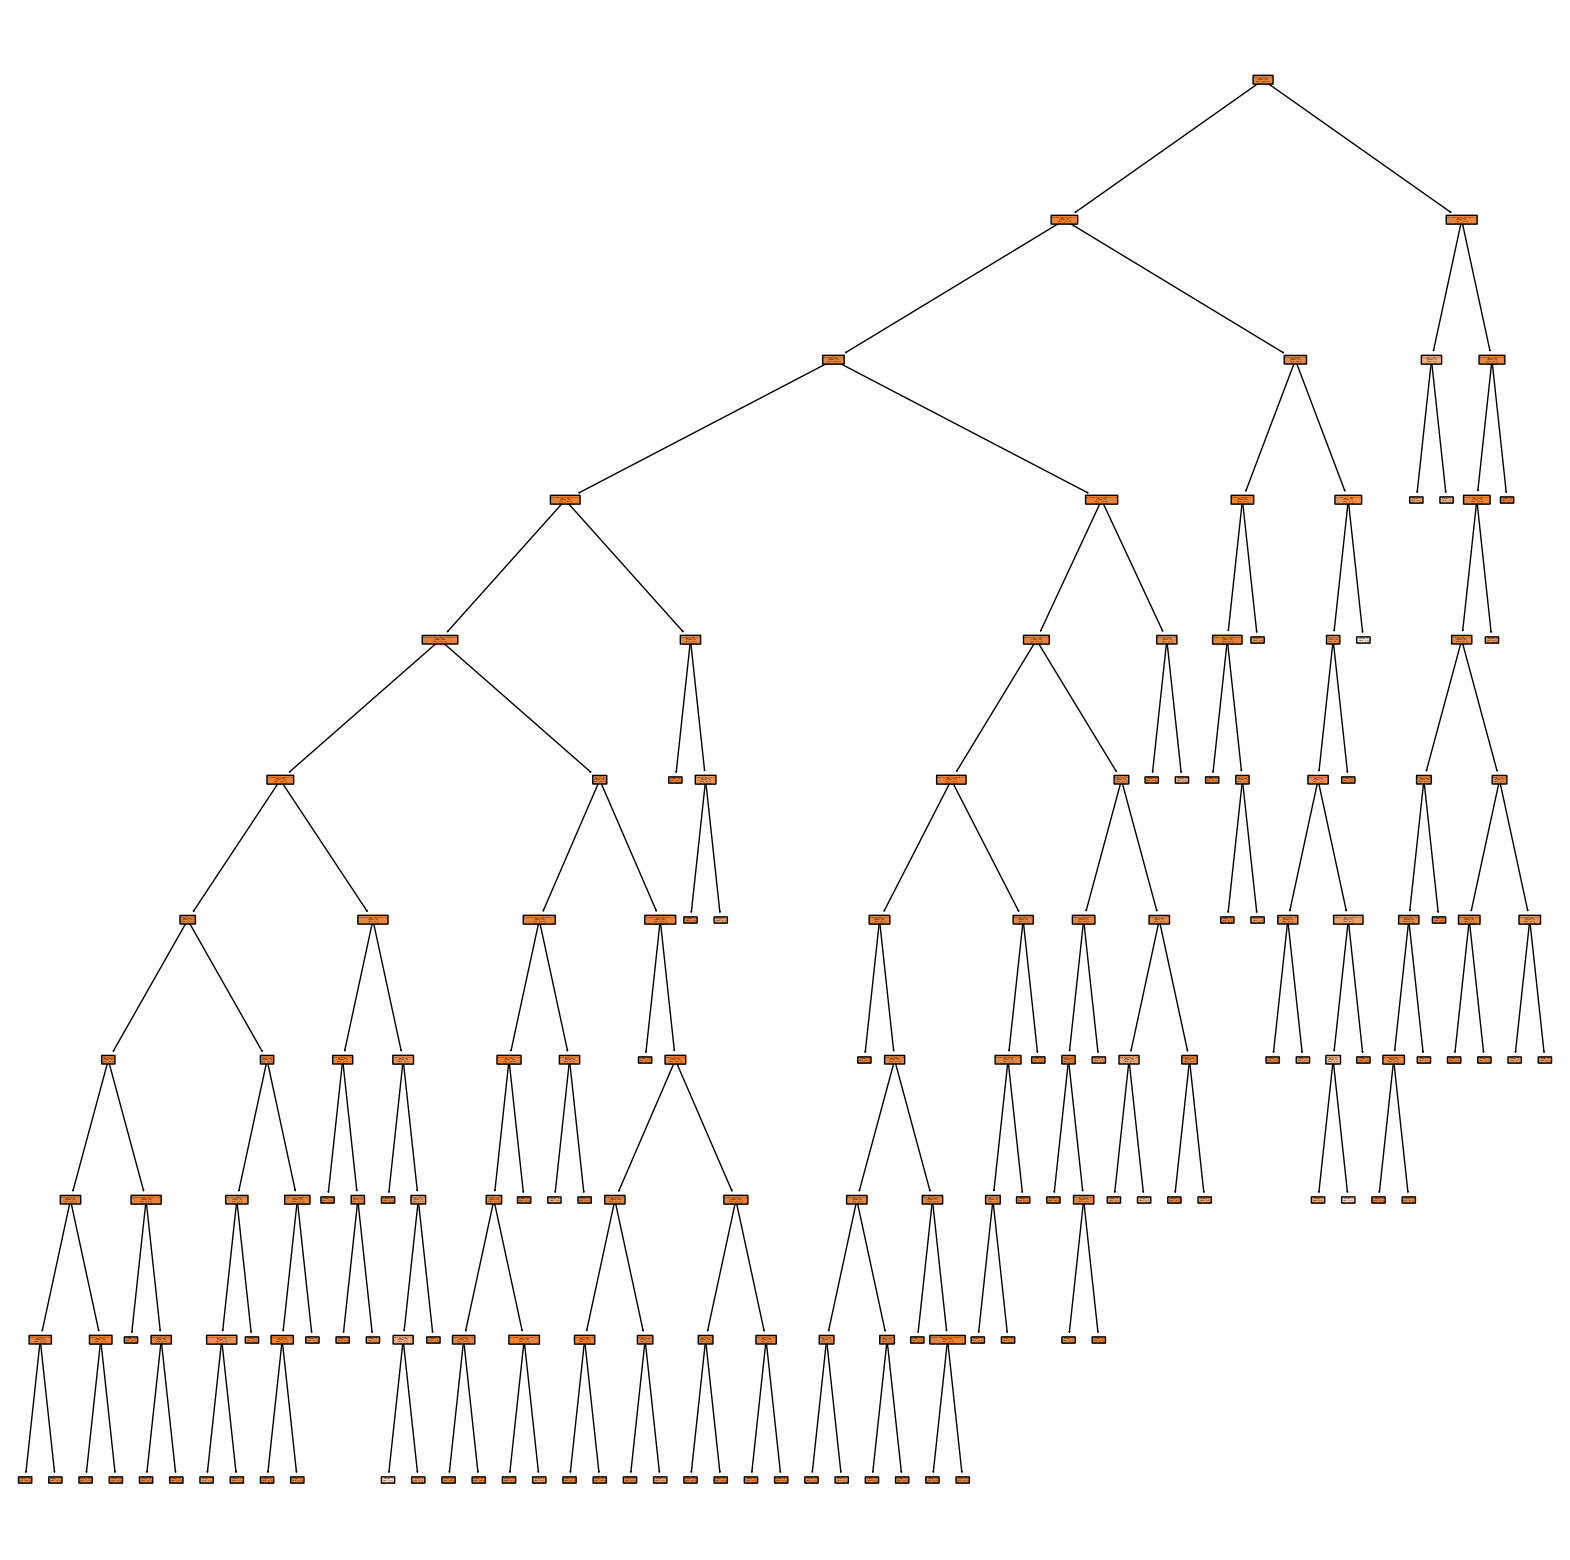

In [24]:
# Plotando a a matriz de classificação da árvore de decisão
plt.figure(figsize=[20,20])
plot_tree(clf,
         filled=True,
         rounded=True,
         class_names=['Aprovado', 'Reprovado'],
         feature_names=X_train.columns);

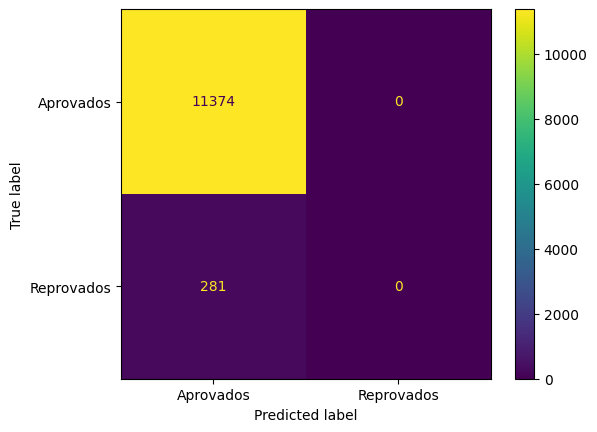

In [25]:
# Plotando a matriz confusão das variáveis de teste
ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test, display_labels=['Aprovados', 'Reprovados'])

In [32]:
# Acurácia da base de treino
predict = clf.predict(X_train)
accuracy_score(y_train, predict)*100

97.81781781781783

In [33]:
# Acurácia da base de teste igual a de treino
predict = clf.predict(X_test)
accuracy_score(y_test, predict)*100

97.58901758901759

In [28]:
# Calculando a proporção de aprovados e reprovados na base de teste
proporcao_aprovados = (predict == 0).sum() / len(predict)
proporcao_reprovados = (predict == 1).sum() / len(predict)

In [35]:
print(f"O valor da proporção de aprovados é {proporcao_aprovados}")
print(f"O valor da proporção de reprovados é {proporcao_reprovados}")

O valor da proporção de aprovados é 1.0
O valor da proporção de reprovados é 0.0
